Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of columns: 22
Number of rows: 70692
Column names: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Missing Values:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk         

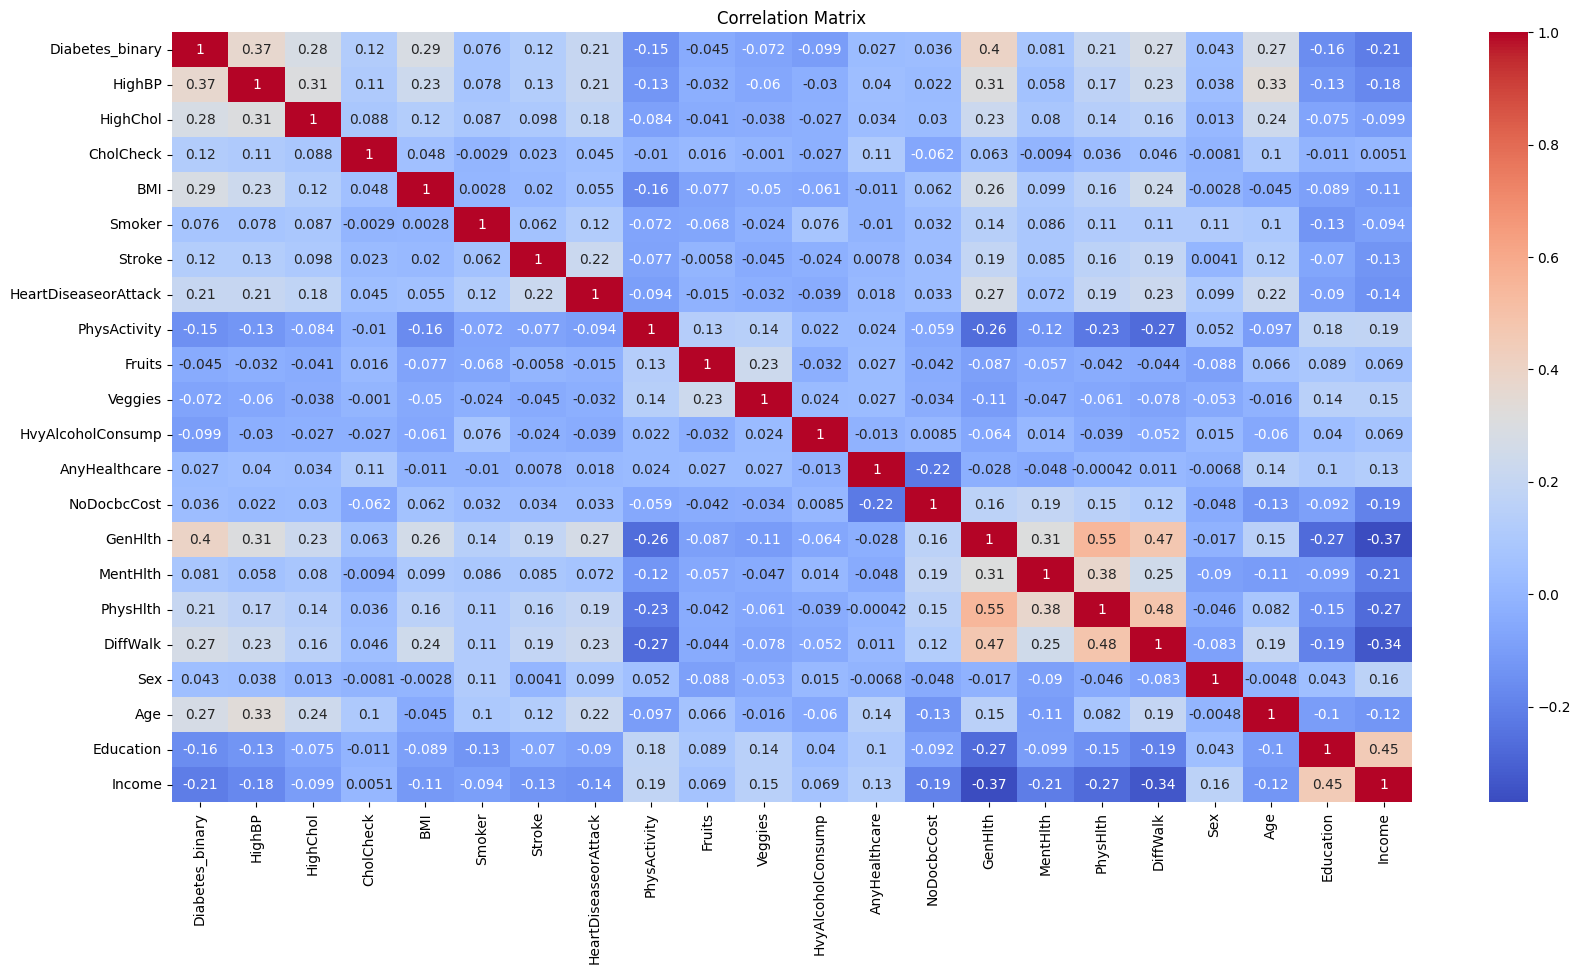

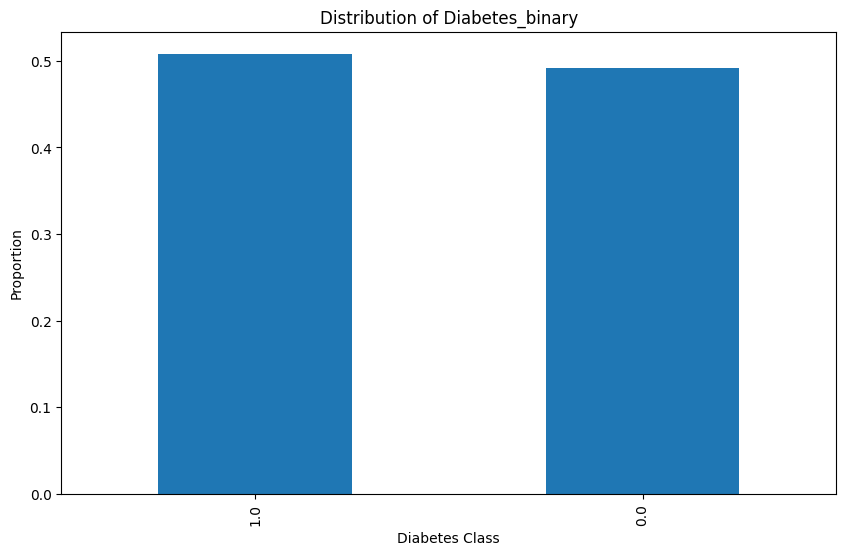

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks, models, optimizers
import keras


from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# How many columns does the dataset contain?
columns = df.shape[1]
print("Number of columns:", columns)

# How many rows are there in the dataset?
rows = df.shape[0]
print("Number of rows:", rows)

# What are the column names?
names = df.columns
print("Column names:", names)

# Check if Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check if Duplicating Values
duplicating_values = df.duplicated().sum()
print("Number of duplicate rows:", duplicating_values)

# Drop Duplicating Values
df = df.drop_duplicates()

# Create Coorelation Matrix of Outcome and Feature Variables
cm = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cm.values, annot=True, cmap='coolwarm', xticklabels=cm.columns, yticklabels=cm.columns)
plt.title("Correlation Matrix")
plt.show()

# Select Features Based on Correlation Matrix
selected_features = ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth','PhysHlth', 'DiffWalk', 'Age', 'Income']

# Set Up Features of Interest
X = df[selected_features]

# Set Up Outcome of Interest
y = df['Diabetes_binary']

# Check of Outcome of Interest is Balanced
plt.figure(figsize=(10, 6))
y.value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes Class')
plt.ylabel('Proportion')
plt.show()

tf.random.set_seed(1234)
np.random.seed(1234)

# Shuffle Data
shuffled_indices = np.random.permutation(len(X))
X = X.iloc[shuffled_indices]
y = y.iloc[shuffled_indices]

# Create Data Splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)

# Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Training Accuracy: 0.7401
Logistic Regression Validation Accuracy: 0.7479
Logistic Regression Test Accuracy: 0.7349


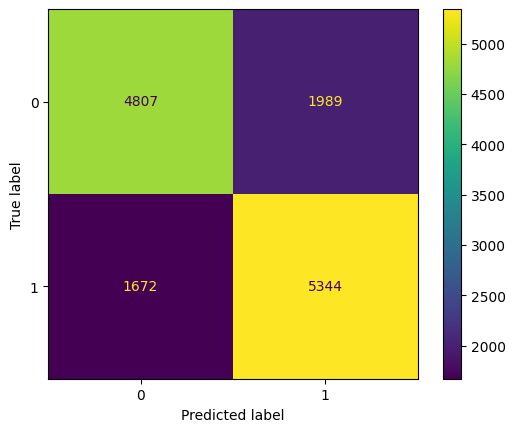

TP: 5344
FN: 1672
FP: 1989
TN: 4807
Diabetic Accuracy: 0.7617
Non-Diabetic Accuracy: 0.7073


In [ ]:
# Baseline Model: Logistic Regression

# Initate Logistic Regression Model
log_reg = LogisticRegression()

# Training the model w/ training set
log_reg.fit(X_train_scaled, y_train)

# Evaluate & Print Training Accuracy
y_pred_train_log = log_reg.predict(X_train_scaled)
train_accuracy_log = accuracy_score(y_train, y_pred_train_log)
print(f'Logistic Regression Training Accuracy: {train_accuracy_log:.4f}')

# Generate predictions on the validation set
y_pred_val_log = log_reg.predict(X_val_scaled)
val_accuracy_log = accuracy_score(y_val, y_pred_val_log)
print(f'Logistic Regression Validation Accuracy: {val_accuracy_log:.4f}')

# Generate predictions on the test set
y_pred_test_log = log_reg.predict(X_test_scaled)
test_accuracy_log = accuracy_score(y_test, y_pred_test_log)
print(f'Logistic Regression Test Accuracy: {test_accuracy_log:.4f}')

# Generate confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred_test_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# TP FN FP TN
print("TP:", cm[1, 1])
print("FN:", cm[1, 0])
print("FP:", cm[0, 1])
print("TN:", cm[0, 0])

# Compute subgroup accuracy
diabetic_accuracy = cm[1, 1] / (cm[1, 1] + cm[1, 0])
non_diabetic_accuracy = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f'Diabetic Accuracy: {diabetic_accuracy:.4f}')
print(f'Non-Diabetic Accuracy: {non_diabetic_accuracy:.4f}')

In [ ]:
# Improved Model: Neural Network
def train_and_evaluate(hidden_1,
                       hidden_2,
                       activation,
                       dropout_1,
                       dropout_2,
                       optimizer_name,
                       epochs,
                       batch_size,
                       learning_rate):

    # clear session
    tf.keras.backend.clear_session()
    tf.random.set_seed(1234)
    np.random.seed(1234)

    # Define the model
    model = keras.models.Sequential()

    # Input Layer
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # First Hidden Layer
    model.add(layers.Dense(hidden_1, activation=activation))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_1))

    # Second Hidden Layer
    model.add(layers.Dense(hidden_2, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_2))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # build and compile model
    optimizer = getattr(keras.optimizers, optimizer_name)(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # define an instance of the early_stopping class
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

    # train model on (X_train_scaled, y_train) data
    model_fit = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], validation_data=(X_val_scaled, y_val))

    # print model summary
    model.summary()

    # evaluate the accuracy on training set and validation set
    train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
    val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

    return model, model_fit


In [ ]:
improved_model, improved_model_fit = train_and_evaluate(hidden_1 = 128,
                       hidden_2 = 64,
                       activation = 'relu',
                       dropout_1 = 0.3,
                       dropout_2 = 0.4,
                       optimizer_name = 'Adam',
                       epochs = 200,
                       batch_size = 128,
                       learning_rate = 0.01)

Epoch 1/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7194 - loss: 0.7768 - val_accuracy: 0.7501 - val_loss: 0.5498
Epoch 2/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7387 - loss: 0.5626 - val_accuracy: 0.7505 - val_loss: 0.5491
Epoch 3/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7380 - loss: 0.5613 - val_accuracy: 0.7505 - val_loss: 0.5441
Epoch 4/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7386 - loss: 0.5602 - val_accuracy: 0.7509 - val_loss: 0.5397
Epoch 5/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7378 - loss: 0.5549 - val_accuracy: 0.7511 - val_loss: 0.5437
Epoch 6/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7400 - loss: 0.5531 - val_accuracy: 0.7503 - val_loss: 0.5356
Epoch 7/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7379 - loss: 0.5537 - val_accuracy: 0.7505 - val_loss: 0.5394
Epoch 8/200
324/324 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7381 - loss: 0.5519 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 19,972 (78.02 KB)

1295/1295 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7415 - loss: 0.5381
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7529 - loss: 0.5290
Training Accuracy: 0.7444
Validation Accuracy: 0.7535


432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.7389


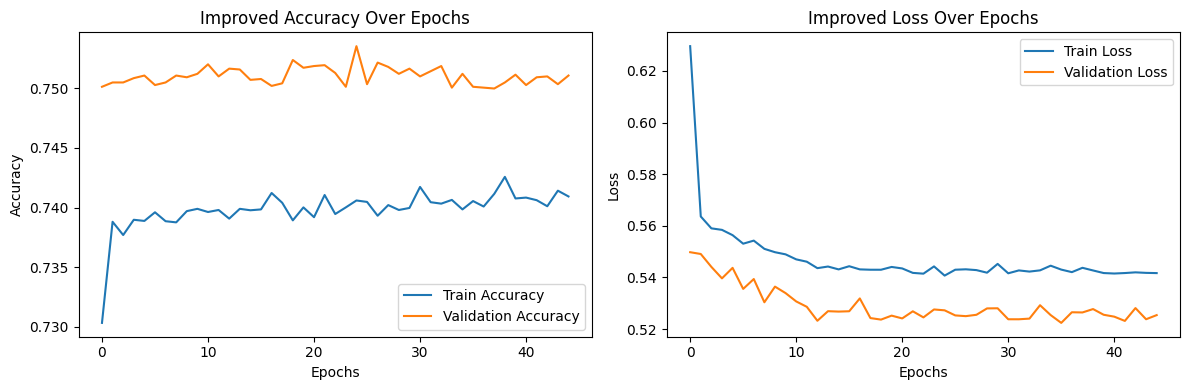

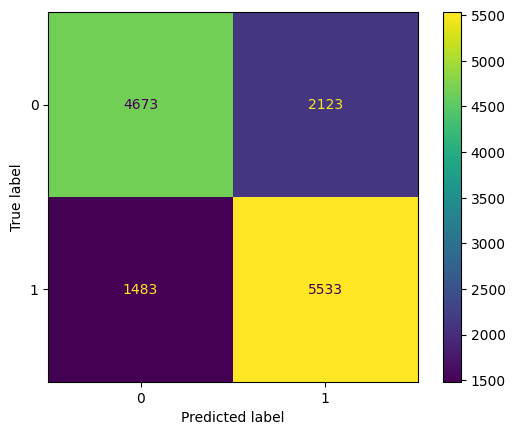

TP: 5533
FN: 1483
FP: 2123
TN: 4673
Diabetic Accuracy: 0.7886
Non-Diabetic Accuracy: 0.6876


In [ ]:
# Evaluation
y_test_pred= improved_model.predict(X_test_scaled) > 0.5
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(improved_model_fit.history['accuracy'], label='Train Accuracy')
plt.plot(improved_model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Improved Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(improved_model_fit.history['loss'], label='Train Loss')
plt.plot(improved_model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Improved Loss Over Epochs')

plt.tight_layout()
plt.show()

# Generate confusion matrix on the test set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Print TP, FN, FP, TN
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]

print("TP:", TP)
print("FN:", FN)
print("FP:", FP)
print("TN:", TN)

# Compute subgroup accuracy
diabetic_accuracy = TP / (TP + FN)
non_diabetic_accuracy = TN / (TN + FP)

print(f'Diabetic Accuracy: {diabetic_accuracy:.4f}')
print(f'Non-Diabetic Accuracy: {non_diabetic_accuracy:.4f}')
